<a href="https://colab.research.google.com/github/adhilaanwar3/Online-shoppers-intention-/blob/main/ONLINE_SHOPPERS_INTENTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all nessessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn. metrics import silhouette_score,accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#for visualization
%matplotlib inline

In [ ]:
#read the data
data=pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#Basic dataset info
print("Dataset shape:",data.shape)
print("Missing values:\n",data.isnull().sum())

Dataset shape: (12330, 18)
Missing values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
#Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
#Label encode catgorical columns
label_enc=LabelEncoder()

In [ ]:
#Identify object(categorical)columns
cat_cols=data.select_dtypes(include='object').columns.tolist()
print("categorical_columns:",cat_cols)

categorical_columns: ['Month', 'VisitorType']


In [ ]:
#Apply label encoding to all categorical columns
for col in cat_cols:
  data[col]=label_enc.fit_transform(data[col])

In [ ]:
#Feature-target split
X = data.drop('Revenue', axis=1)
y = data['Revenue']

In [ ]:
#scale numerical feature
Scaler=StandardScaler()
X_scaled=Scaler.fit_transform(X)


/tmp/ipython-input-26-3857921718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Revenue',palette='Set2')


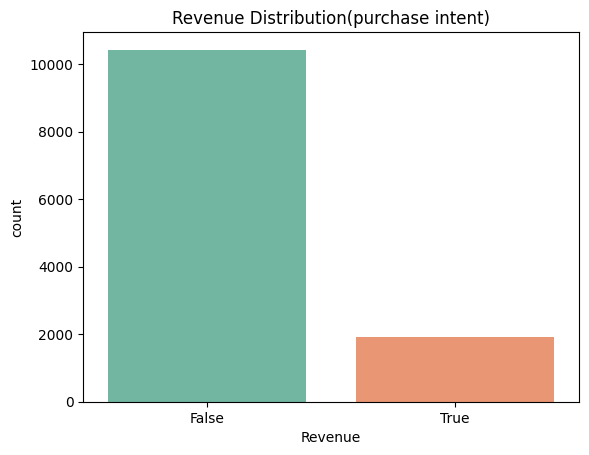

In [ ]:
#visualization
#plot 1:Revenue distribution(target)
sns.countplot(data=df,x='Revenue',palette='Set2')
plt.title('Revenue Distribution(purchase intent)')
plt.show()


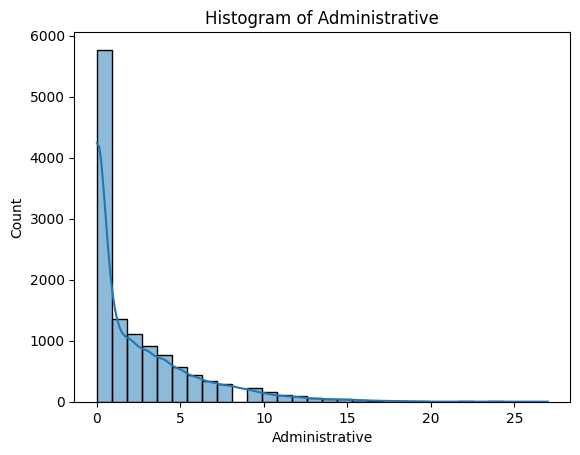

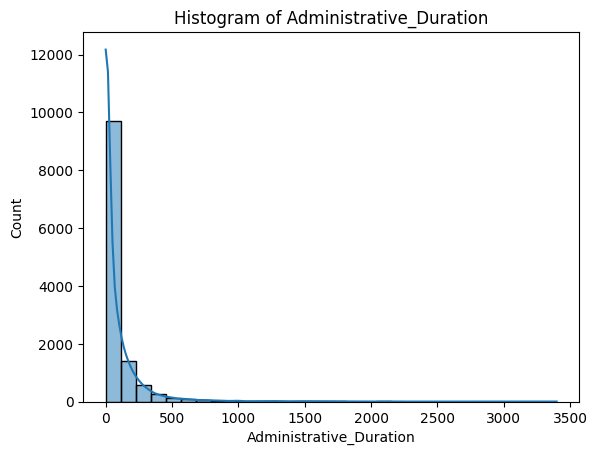

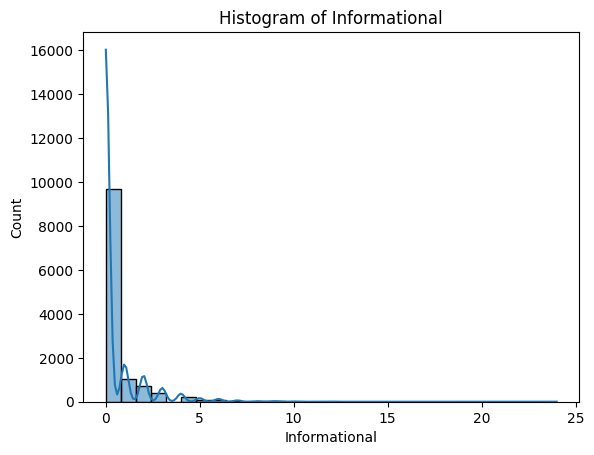

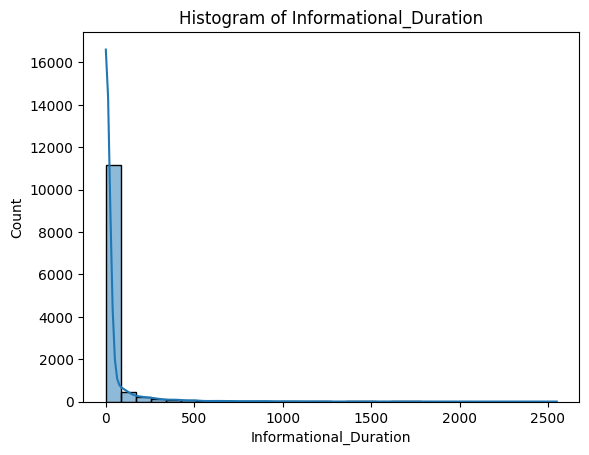

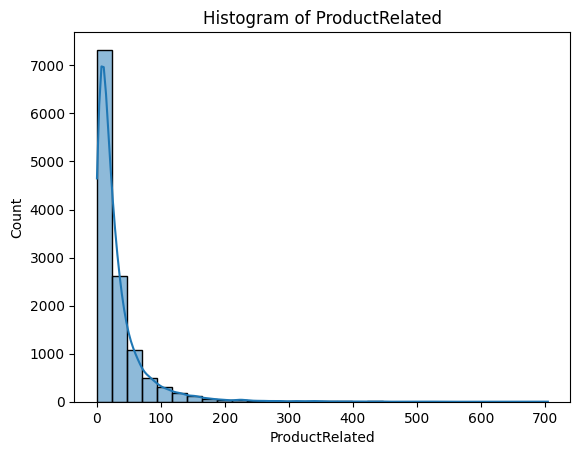

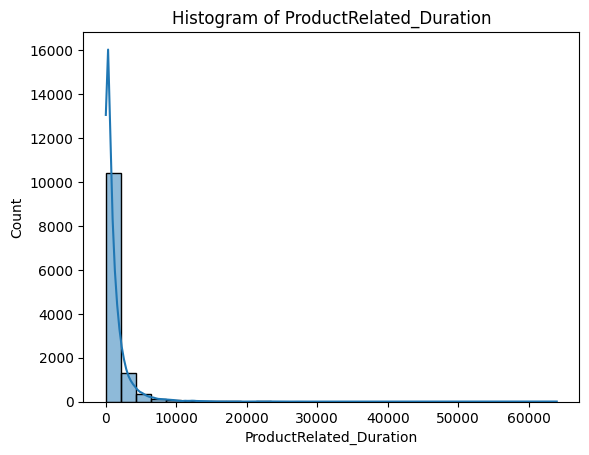

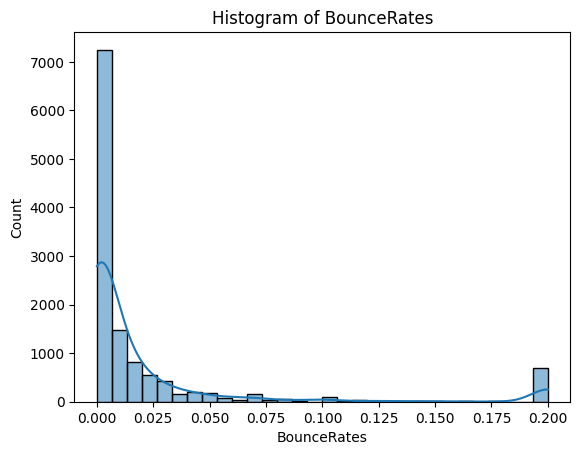

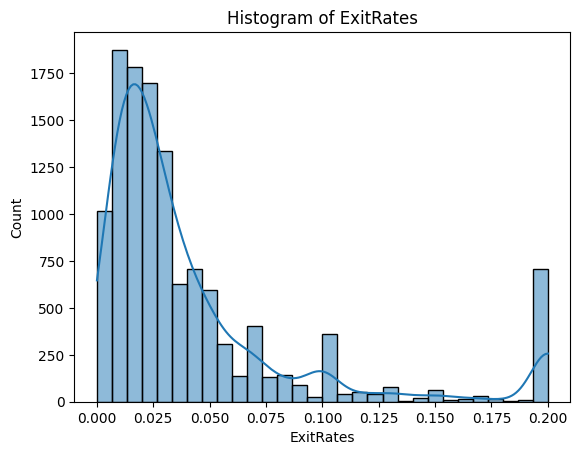

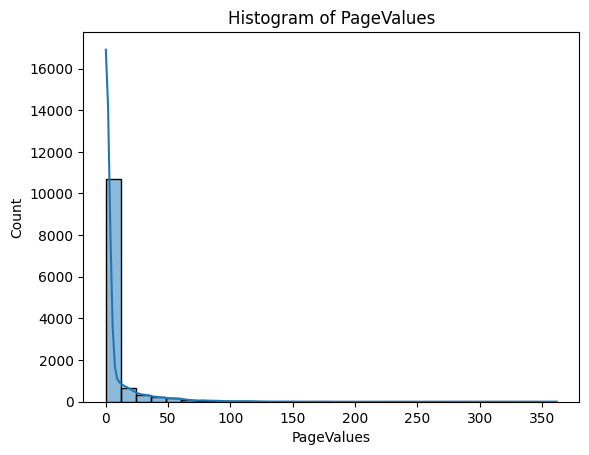

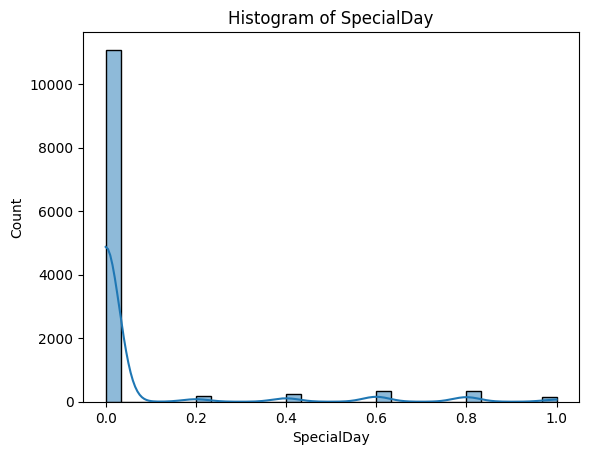

In [ ]:
#plot 2:histogram
num_cols= ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']
for col in num_cols:
  sns.histplot(data=data,x=col,kde=True,bins=30)
  plt.title(f'Histogram of {col}')
  plt.show()



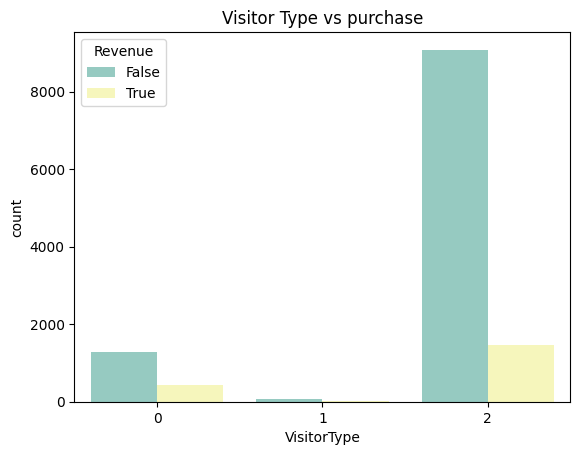

In [ ]:
#plot 3:visitor type vs revenue
sns.countplot(data=df,x='VisitorType',hue='Revenue',palette='Set3')
plt.title('Visitor Type vs purchase')
plt.show()

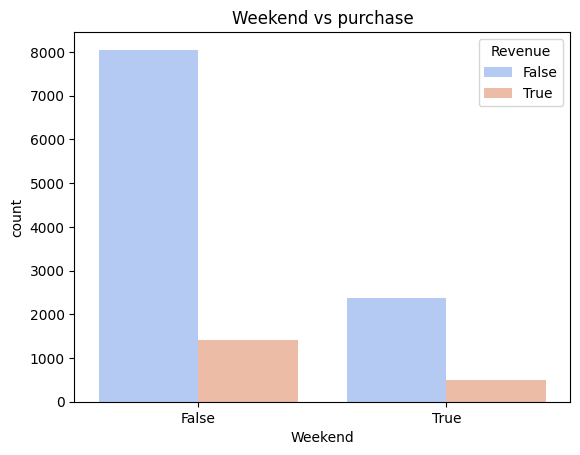

In [ ]:
#plot 4:weekend effect on purchase
sns.countplot(data=df,x='Weekend',hue='Revenue',palette='coolwarm')
plt.title('Weekend vs purchase')
plt.show()

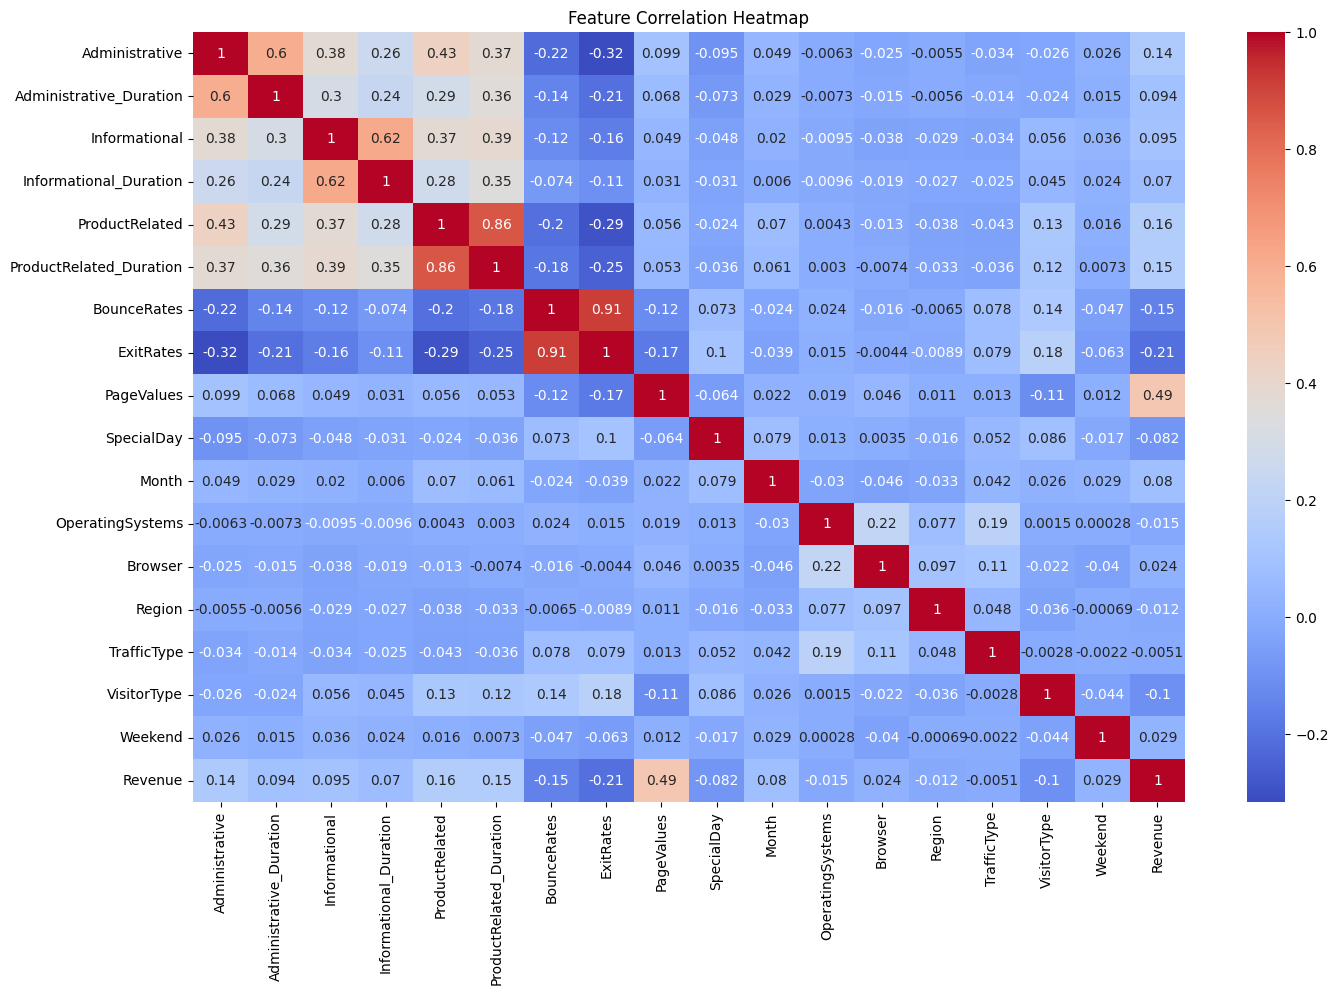

In [ ]:
#plot 5:correlation heatmap
plt.figure(figsize=(16,10))
corr=data.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


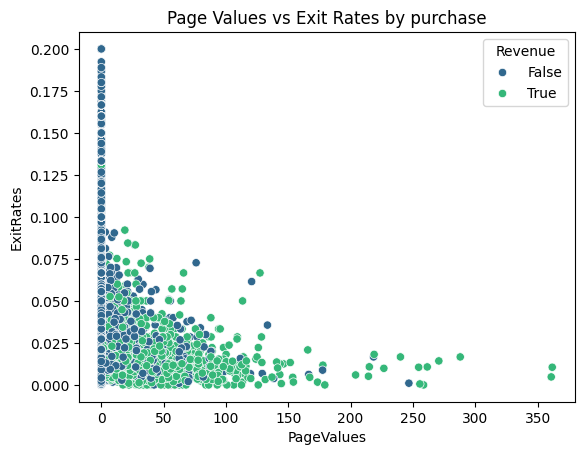

In [ ]:
#plot 6:Scatterplot of page values vs exit rates
sns.scatterplot(data=data,x='PageValues',y='ExitRates',hue='Revenue',palette='viridis')
plt.title('Page Values vs Exit Rates by purchase')
plt.show()

(12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTyp

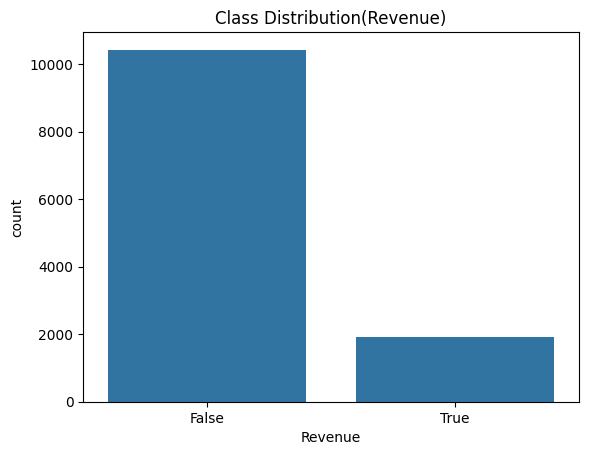

In [ ]:
print(data.shape)
print(data.info())
print(data['Revenue'].value_counts())

#plot class distribution
sns.countplot(data=data,x='Revenue')
plt.title('Class Distribution(Revenue)')
plt.show()

In [ ]:
#define classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()

}

In [ ]:
#handle any missing values
data.dropna(inplace=True)

In [ ]:
#features $ target
X=data.drop('Revenue',axis=1)
y=data['Revenue']


In [ ]:
#Train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#feature scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
#random forest classifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#prediction
y_pred=model.predict(X_test_scaled)

In [ ]:
print('Accuracy:',
      accuracy_score(y_test,y_pred))
print('confusion matrix:\n',
      confusion_matrix(y_test,y_pred))
print('classification report:\n',
      classification_report(y_test,y_pred))

Accuracy: 0.8961881589618816
confusion matrix:
 [[1985   70]
 [ 186  225]]
classification report:
               precision    recall  f1-score   support

       False       0.91      0.97      0.94      2055
        True       0.76      0.55      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



In [ ]:
#Clustering

numeric_cols =[
    'Administrative','Informational','ProductRelated',
    'BounceRates','ExitRates','PageValues',
    'SpecialDay','Administrative_Duration',
    'Informational_Duration','ProductRelated_Duration'
    ]
#use your standardized features
X = data[numeric_cols]

#reduce dimensions for visualization
pca=PCA(n_components=2)
X_pca = pca.fit_transform(X)

#KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X)

#DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X)

#Hierarchial clustering
agg = AgglomerativeClustering(n_clusters=4)
data['Hierarchical_Cluster'] = agg.fit_predict(X)

# Plotting function
def plot_cluster(xy,labels,title):
  plt.figure(figsize=(6,5))
  sns.scatterplot(x=xy[:,0],y=xy[:,1],hue=labels,palette='set2')
  plt.title(title)
  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')
  plt.legend(title="Cluster",loc='best',bbox_to_anchor=(1.05,1))
  plt.tight_layout()
  plt.grid(True)
  plt.show()

  #visualize clustering results
  plot_cluster(X_pca,data['KMeans_Cluster'],'KMeans Clustering')
  plot_cluster(X_pca,data['DBSCAN_Cluster'],'DBSCAN Clustering')
  plot_cluster(X_pca,data['Hierarchical_Cluster'],'Hierarchical Clustering')


In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
data['DBSCAN_Optimized'] = dbscan.fit_predict(data[numeric_cols])

In [ ]:
def generate_cluster_profile(df,cluster_col,feature_to_summarize):

  #compute means
  profile_means=data.groupby(cluster_col)[feature_to_summarize].mean()

  #compute cluster sizes
  cluster_counts=data[cluster_col].value_counts().sort_index()
  profile_means['count']=cluster_counts.values

  #add clustersizes
  return profile_means.reset_index()



In [ ]:
#select features to analyze
features = [
    'Administrative','Informational','ProductRelated',
    'BounceRates','ExitRates','PageValues'
    ]

    #generate cluster profiles
kmeans_profile= generate_cluster_profile(data,'KMeans_Cluster',features)
dbscan_profile=generate_cluster_profile(data,'DBSCAN_Optimized',features)
hierarchical_profile=generate_cluster_profile(data,'Hierarchical_Cluster',features)

print('KMeans cluster profile with counts:')
print(kmeans_profile)

KMeans cluster profile with counts:
   KMeans_Cluster  Administrative  Informational  ProductRelated  BounceRates  \
0               0        4.316136       1.174507       77.673748     0.007144   
1               1        7.427885       2.735577      235.701923     0.005924   
2               2        1.820404       0.327058       18.596550     0.025457   

   ExitRates  PageValues  count  
0   0.021683    8.003233   1977  
1   0.019645    4.499633    208  
2   0.047721    5.505789  10145  


In [ ]:
print('DBSCAN cluster profile with counts:')
print(dbscan_profile)

DBSCAN cluster profile with counts:
    DBSCAN_Optimized  Administrative  Informational  ProductRelated  \
0                 -1        2.909280       0.643354       39.370259   
1                  0        0.076408       0.008043        1.290885   
2                  1        0.241048       0.006987        4.020961   
3                  2        0.064516       0.000000        6.185484   
4                  3        0.140625       0.000000        5.578125   
..               ...             ...            ...             ...   
71                70        0.000000       0.000000        5.800000   
72                71        0.000000       0.200000        9.000000   
73                72        0.000000       0.000000       14.500000   
74                73        0.200000       0.000000        8.800000   
75                74        0.000000       0.000000        6.800000   

    BounceRates  ExitRates  PageValues  count  
0      0.009593   0.027257    7.545937   9623  
1      0.188400

In [ ]:
print('Hierarchical cluster profile with counts:')
print(hierarchical_profile)

Hierarchical cluster profile with counts:
   Hierarchical_Cluster  Administrative  Informational  ProductRelated  \
0                     0        7.632353       3.470588      330.132353   
1                     1        3.318560       0.800302       46.636615   
2                     2        5.620290       1.655072      127.988406   
3                     3        1.443363       0.217471       12.537035   

   BounceRates  ExitRates  PageValues  count  
0     0.005365   0.018599    4.232144     68  
1     0.008559   0.024028    8.835420   3971  
2     0.006790   0.021262    6.810414    690  
3     0.030862   0.055221    4.281295   7601  


/tmp/ipython-input-38-3482124793.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


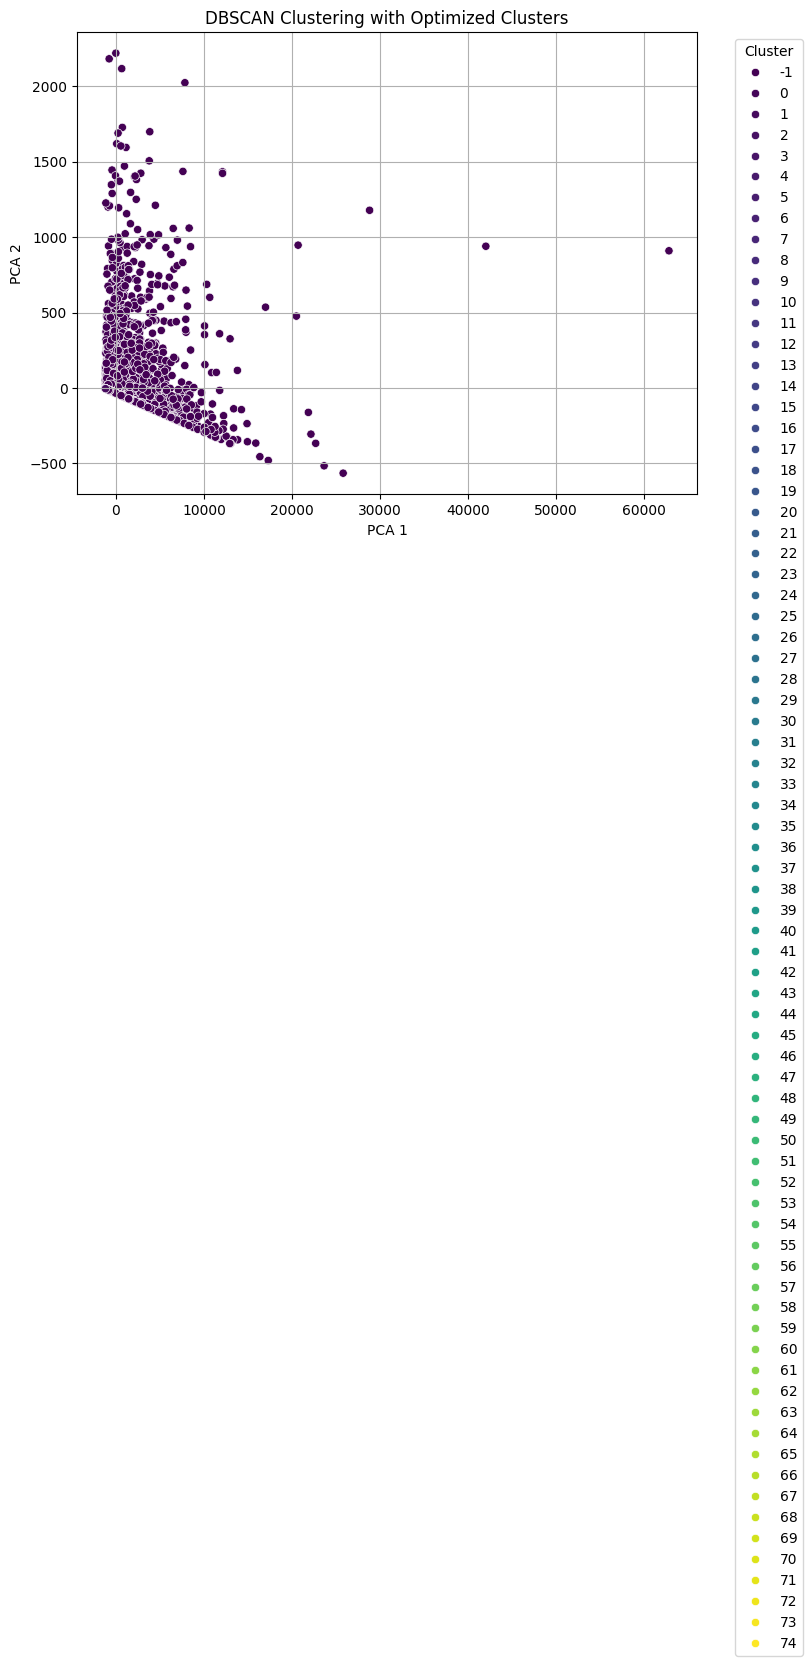

In [ ]:
X=data[numeric_cols]

#pca for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#plot the optimized dbscan clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],y=X_pca[:,1],
    hue=data['DBSCAN_Optimized'],
    palette='viridis',
    legend='full')
plt.title('DBSCAN Clustering with Optimized Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.legend(title='Cluster',bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()
